In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
tf.random.set_seed(42)
file_name = '/content/drive/My Drive/Colab Notebooks/extrusion.csv'
df = pd.read_csv(file_name)
columns = df.columns.tolist()
del df['Datum']
columns.remove('Datum')
##
## 드롭na off
##
#df = df.dropna(axis=0)

In [5]:
target_index = columns.index('ST110_VAREx_0_SDickeIst')
print(target_index)

X = np.asarray(df)[:, :]
Y = np.asarray(df)[:, target_index]

print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

157
X.shape:  (226536, 469)
Y.shape:  (226536,)


In [6]:
null_row = []

for i in range(len(X)):
    for j in range(len(columns)):
        if pd.isnull(X[i,j]):
            null_row.append(i)

In [7]:
null_row = sorted(list(set(null_row)))

print(null_row)
print(len(null_row))

[18398, 18399, 18400, 18454, 20979, 24019, 24035, 58210, 58211, 58212, 62021, 62022, 62023, 62024, 62025, 62026, 62027, 62028, 62029, 70978, 71524, 71576, 78210, 82932, 82933, 82934, 87052, 87053, 91158, 96208, 96209, 96210, 96211, 96212, 96213, 96214, 96215, 96216, 96217, 96218, 96219, 96220, 96221, 96222, 96223, 96224, 96225, 96226, 96227, 96228, 96229, 96230, 96231, 96232, 96233, 96234, 96235, 96236, 96237, 96238, 96239, 96240, 96241, 96242, 96243, 96244, 96245, 96246, 96247, 96248, 96249, 96250, 96251, 96252, 96253, 96254, 96255, 96256, 96257, 96258, 96259, 96260, 96261, 96262, 96263, 96264, 96265, 96266, 96267, 96268, 96269, 96270, 96271, 96272, 96273, 96274, 96275, 96276, 96277, 96278, 96279, 96280, 96281, 96282, 96283, 96284, 96285, 96286, 96287, 96288, 96289, 96290, 96291, 96292, 96293, 96294, 96295, 96296, 96297, 96298, 96299, 96300, 96301, 96302, 96303, 96304, 96305, 96306, 96307, 96308, 96309, 96310, 96311, 96312, 96313, 96314, 96315, 96316, 96317, 96318, 96319, 96320, 96321

In [8]:
seq_length = 250
predict_length = 10
input_columns = len(columns)

num_Data = 1

if null_row[0] - 1 > seq_length + predict_length:
    Y0 = Y[:null_row[0] - 1]

for i in range(1, len(null_row)):
    if null_row[i] - null_row[i-1] - 1 > seq_length + predict_length:
        #locals()['X{}'.format(num_Data)] = X[null_row[i-1] + 1 : null_row[i] - 1, :]
        locals()['Y{}'.format(num_Data)] = Y[null_row[i-1] + 1 : null_row[i] - 1]
        num_Data += 1

In [9]:
for i in range(num_Data):
    print('Y{}.shape = '.format(i), locals()['Y{}'.format(i)].shape)

Y0.shape =  (18397,)
Y1.shape =  (2523,)
Y2.shape =  (3038,)
Y3.shape =  (34173,)
Y4.shape =  (3807,)
Y5.shape =  (8947,)
Y6.shape =  (544,)
Y7.shape =  (6632,)
Y8.shape =  (4720,)
Y9.shape =  (4116,)
Y10.shape =  (4103,)
Y11.shape =  (5048,)
Y12.shape =  (24594,)
Y13.shape =  (416,)
Y14.shape =  (3948,)
Y15.shape =  (8201,)
Y16.shape =  (2915,)
Y17.shape =  (2347,)
Y18.shape =  (7396,)
Y19.shape =  (3704,)
Y20.shape =  (2903,)
Y21.shape =  (4020,)
Y22.shape =  (9176,)
Y23.shape =  (11618,)
Y24.shape =  (7931,)
Y25.shape =  (3909,)
Y26.shape =  (13658,)
Y27.shape =  (5338,)


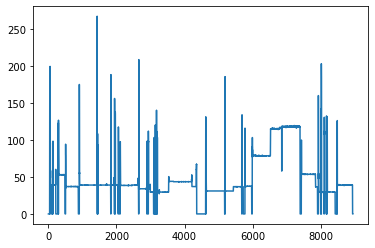

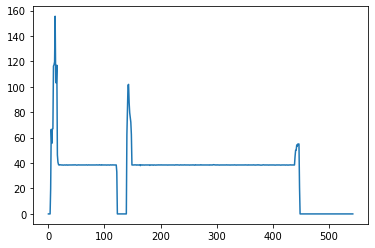

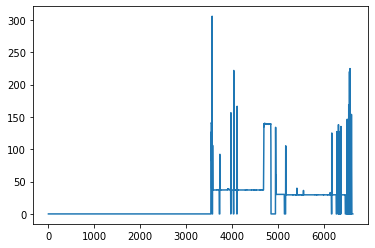

In [10]:
#Y5,Y6,Y7 만 무작위로 뽑아본것

plt.figure(figsize=(6, 4))
plt.plot(Y5, label='actual')
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(Y6, label='actual')
plt.show()
plt.figure(figsize=(6, 4))
plt.plot(Y7, label='actual')
plt.show()



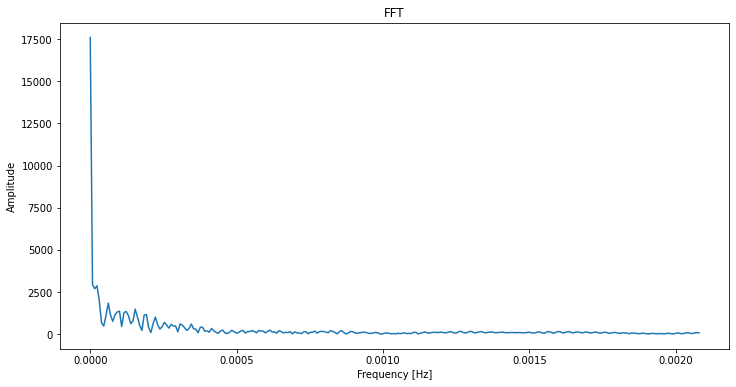

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<Figure size 432x288 with 0 Axes>

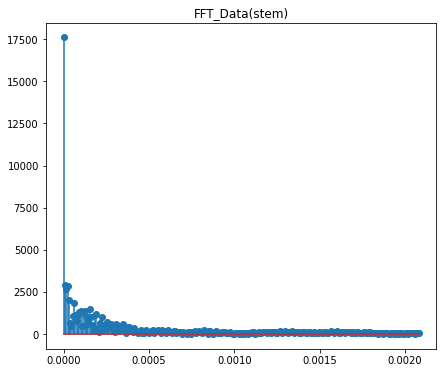

<Figure size 432x288 with 0 Axes>

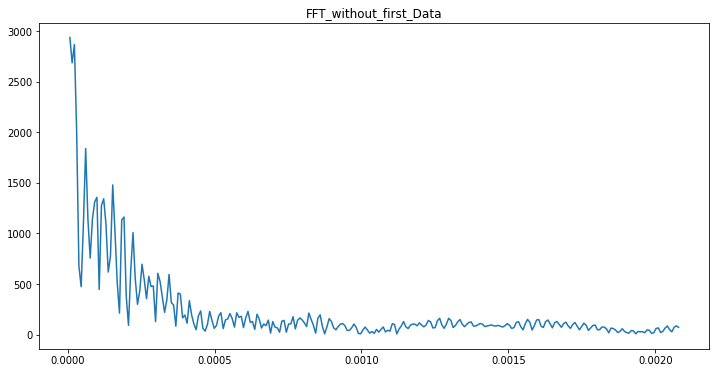

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


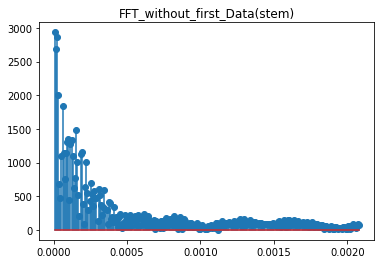

In [42]:
# #sample_rate = 120   # sampling frequency  Hz  
data_length = len(Y6)
sample_rate = 1/120 
sec = 120 * data_length
N = (sec - 0) * sample_rate
N = int(N)

#Time taken by one complete cycle of wave (seconds)
T = 120                              
#Calculating sampling frequency
F = 1/T                         
#Avoid aliasing by multiplying sampling frequency by 1/2 
f = np.linspace(0, 0.5*F, N)


plt.figure(figsize=(12, 6))
s1 = Y6
fft = fftpack.fft(s1)


#Plotting frequency domain against amplitude
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.figure(1)
plt.plot(f[:N // 2], np.abs(fft)[:N // 2])
plt.title('FFT')
plt.show()
plt.figure(2)
plt.figure(figsize=(7, 6))
plt.stem(f[:N// 2],  np.abs(fft)[:N // 2])
plt.title('FFT_Data(stem)')
plt.show()


plt.figure(3)
plt.figure(figsize=(12, 6))
plt.plot(f[1:N // 2], np.abs(fft)[1:N // 2])
plt.title('FFT_without_first_Data') #0번째 값을 제외한 FFT결과 => 0번째 값이 너무 크게 나와서 (0Hz) 없애고 나머지 신호를 한번 본것
plt.show()

plt.figure(4)
plt.stem(f[1:N// 2],  np.abs(fft)[1:N // 2])
plt.title('FFT_without_first_Data(stem)') #0번째 값을 제외한 FFT결과
plt.show()
#############################################################################


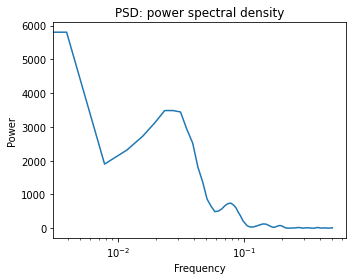

In [29]:
from scipy import signal
freqs, psd = signal.welch(s1)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

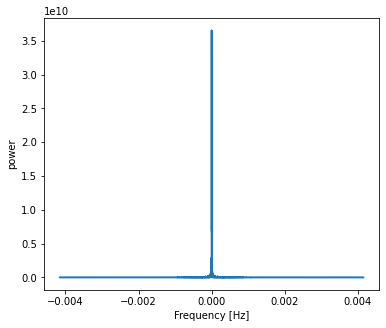

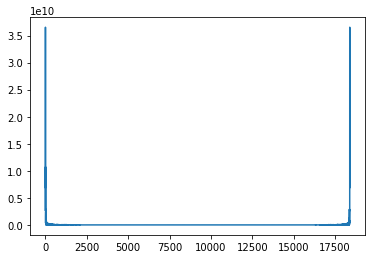

area: 0.12784522832215525


In [40]:
#FFT의 Power를 계산합니다.
# The FFT of the signal
s1 = Y0
sig_fft = fftpack.fft(s1)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2 # np.abs(sig_fft)*np.abs(sig_fft)
time_step = 120 #임의 

# The corresponding frequencies
sample_freq = fftpack.fftfreq(s1.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq[1:], power[1:])
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.show()
import scipy.stats as stats
from sympy import Symbol, exp, sqrt, pi, Integral

plt.plot(power[1:])
plt.show()
# 면적 계산
#area = np.trapz([power[-1], power[1]], dx=len(power)-1) - np.trapz(power)
area = np.trapz(power, dx=1/120)*2*10**-11
print("area:",area)


In [16]:
def windown(window_length):
  return np.hanning(window_length)

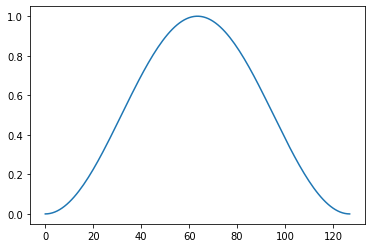

In [17]:
window128 = np.hanning(128)
window127 = np.hanning(127)
window8947 = np.hanning(len(Y5))
window8946 = np.hanning(len(Y5)-1)
plt.plot(window128)

window8192 = windown(8192)

In [18]:
Y52n =Y5[:8192]  #2의 n승 개로 갯수를 잘라 본것 # 8192 = 2^13
Y52n.shape

(8192,)

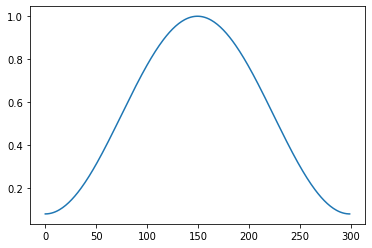

In [19]:
np.hamming(300)
plt.plot(np.hamming(300))

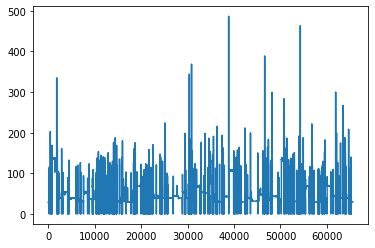

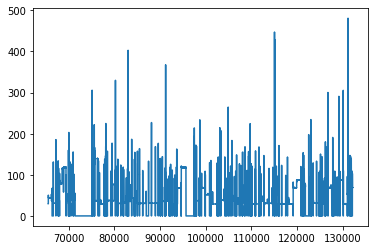

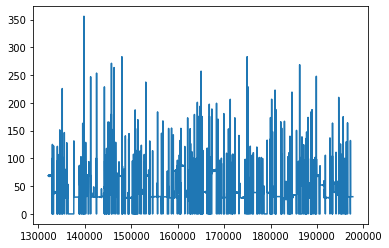

In [31]:
########################
#dropna on 
########################

## 각각 하나씩의 배치에서 한것이 아닌 전체 데이터 한번 확인해보고 싶어서 작성한 코드

df = df.dropna(axis=0) 
Y_1 = df.iloc[:65536, 157]      #Batch_size 65536 = 2^16
Y_2 = df.iloc[65536:65536*2, 157]
Y_3 = df.iloc[65536*2:65536*3, 157]

plt.plot(Y_1, label='actual')
plt.show()
plt.plot(Y_2, label='actual')
plt.show()
plt.plot(Y_3, label='actual')
plt.show()

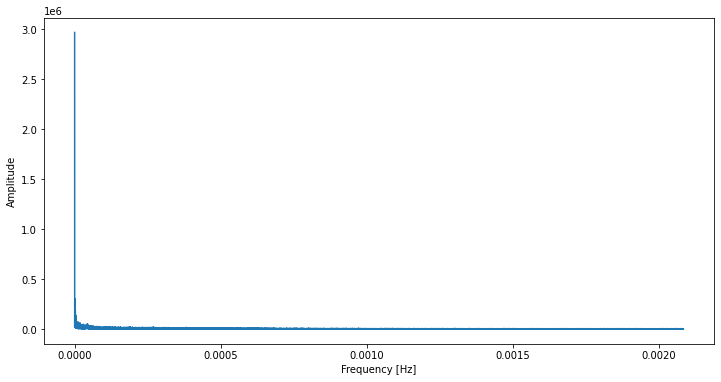

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


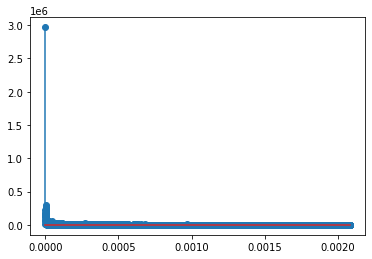

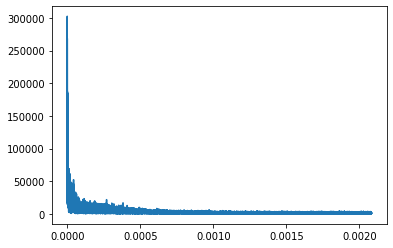

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


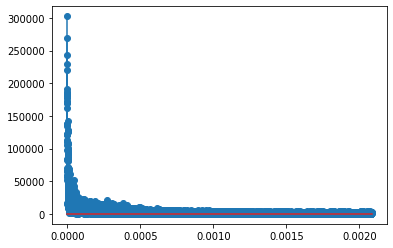

In [34]:
#Batch 1
data_length = len(Y_1)
sample_rate = 1/120 
sec = 120 * data_length
N = (sec - 0) * sample_rate
N = int(N)

#Time taken by one complete cycle of wave (seconds)
T = 120                              
#Calculating sampling frequency
F = 1/T                         
#Avoid aliasing by multiplying sampling frequency by 1/2 
f = np.linspace(0, 0.5*F, N)


plt.figure(figsize=(12, 6))
s1 = Y_1.values
fft = fftpack.fft(s1)


#Plotting frequency domain against amplitude
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.figure(1)
plt.plot(f[:N // 2], np.abs(fft)[:N // 2])
plt.show()
plt.figure(2)
plt.stem(f[:N// 2],  np.abs(fft)[:N // 2])
plt.show()


#plt.xlim([0,0.0005])

plt.figure(3)
plt.plot(f[1:N // 2], np.abs(fft)[1:N // 2])
plt.show()

plt.figure(4)
plt.stem(f[1:N// 2],  np.abs(fft)[1:N // 2])
plt.show()
#############################################################################



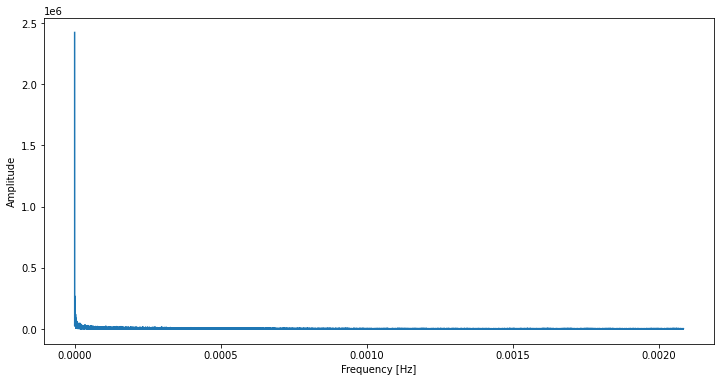

In [35]:
#Batch#2
data_length = len(Y_2)
sample_rate = 1/120 
sec = 120 * data_length
N = (sec - 0) * sample_rate
N = int(N)

#Time taken by one complete cycle of wave (seconds)
T = 120                              
#Calculating sampling frequency
F = 1/T                         
#Avoid aliasing by multiplying sampling frequency by 1/2 
f = np.linspace(0, 0.5*F, N)
plt.figure(figsize=(12, 6))
s2 = Y_2.values
fft2 = fftpack.fft(s2)



#Plotting frequency domain against amplitude
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.figure(1)
plt.plot(f[:N // 2], np.abs(fft2)[:N // 2])

#plt.xlim([0,0.0005])
plt.show()

#############################################################################

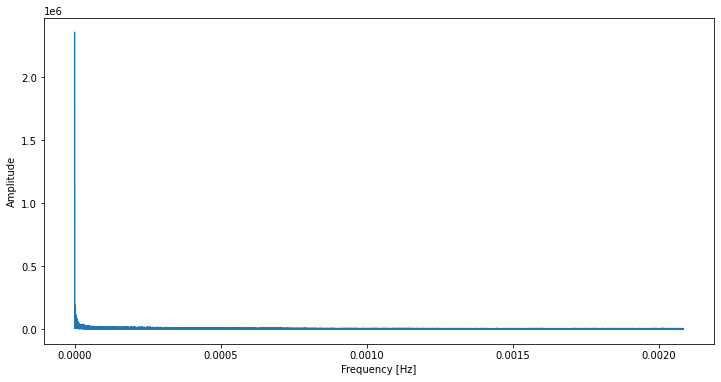

In [36]:
#Batch #3

#Batch 1
data_length = len(Y_3)
sample_rate = 1/120 
sec = 120 * data_length
N = (sec - 0) * sample_rate
N = int(N)

#Time taken by one complete cycle of wave (seconds)
T = 120                              
#Calculating sampling frequency
F = 1/T                         
#Avoid aliasing by multiplying sampling frequency by 1/2 
f = np.linspace(0, 0.5*F, N)
plt.figure(figsize=(12, 6))
s3 = Y_3.values
fft3 = fftpack.fft(s3)


#Plotting frequency domain against amplitude
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.figure(1)
plt.plot(f[:N // 2], np.abs(fft3)[:N // 2])

#plt.xlim([0,0.0005])
plt.show()

